In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
oil = pd.read_csv('oil.csv')
holidays = pd.read_csv('holidays_events.csv')
transactions = pd.read_csv('transactions.csv')

In [2]:
data_all = pd.concat((train, test))
data_all

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,NaN,1
28508,3029396,2017-08-31,9,PREPARED FOODS,NaN,0
28509,3029397,2017-08-31,9,PRODUCE,NaN,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9


In [3]:
holidays_combined = []

for type in pd.factorize(holidays.type)[1]:
    for locale in pd.factorize(holidays.locale)[1]:
        for transferred in pd.factorize(holidays.transferred)[1].astype(str):
            holidays_combined.append(type+'_'+locale+'_'+transferred)

In [4]:
len(holidays_combined)

36

In [5]:
holidays_counts = pd.DataFrame(columns=['date']+holidays_combined)

for index in holidays.index:
    date = holidays.date[index]
    holiday_combined = holidays.type[index]+'_'+holidays.locale[index]+'_'+holidays.transferred[index].astype(str)
    if date not in holidays_counts.date.values:
        holidays_counts.loc[len(holidays_counts)] = [date] + [0 for _ in range(36)]
    holidays_counts.loc[len(holidays_counts)-1, holiday_combined] += 1

In [6]:
holidays_counts

,date,Holiday_Local_False,Holiday_Local_True,Holiday_Regional_False,Holiday_Regional_True,Holiday_National_False,Holiday_National_True,Transfer_Local_False,Transfer_Local_True,Transfer_Regional_False,...,Work Day_Regional_False,Work Day_Regional_True,Work Day_National_False,Work Day_National_True,Event_Local_False,Event_Local_True,Event_Regional_False,Event_Regional_True,Event_National_False,Event_National_True
0,2012-03-02,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-04-01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-04-12,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-04-14,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-04-21,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2017-12-22,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308,2017-12-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309,2017-12-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
310,2017-12-25,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# 合并数据
data_all = data_all.merge(stores, on='store_nbr', how='left')

data_all = data_all.merge(oil, on='date', how='left')

data_all = data_all.merge(transactions, on=['date', 'store_nbr'], how='left')

data_all = data_all.merge(holidays_counts, on='date', how='left')

In [8]:
data_all.isna().sum()

id                                 0
date                               0
store_nbr                          0
family                             0
sales                          28512
onpromotion                        0
city                               0
state                              0
type                               0
cluster                            0
dcoilwtico                    935550
transactions                  274296
Holiday_Local_False          2578554
Holiday_Local_True           2578554
Holiday_Regional_False       2578554
Holiday_Regional_True        2578554
Holiday_National_False       2578554
Holiday_National_True        2578554
Transfer_Local_False         2578554
Transfer_Local_True          2578554
Transfer_Regional_False      2578554
Transfer_Regional_True       2578554
Transfer_National_False      2578554
Transfer_National_True       2578554
Additional_Local_False       2578554
Additional_Local_True        2578554
Additional_Regional_False    2578554
A

<Axes: >

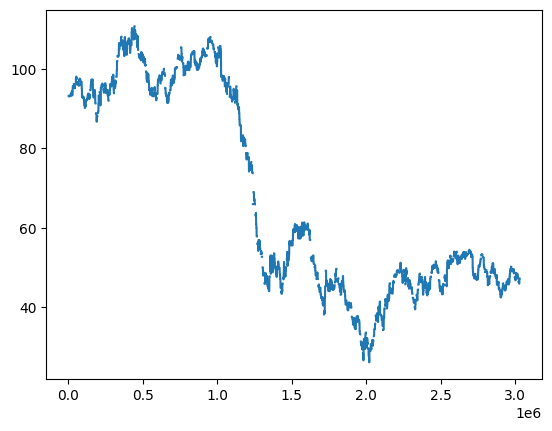

In [9]:
data_all.dcoilwtico.plot()

<Axes: >

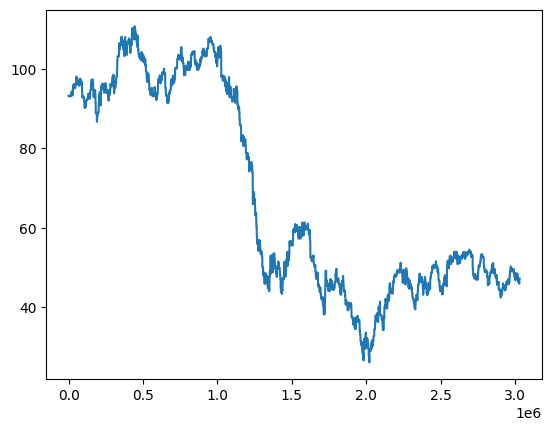

In [10]:
data_all.dcoilwtico.bfill(inplace=True)
data_all.dcoilwtico.plot()

In [11]:
data_all.isna().sum()

id                                 0
date                               0
store_nbr                          0
family                             0
sales                          28512
onpromotion                        0
city                               0
state                              0
type                               0
cluster                            0
dcoilwtico                         0
transactions                  274296
Holiday_Local_False          2578554
Holiday_Local_True           2578554
Holiday_Regional_False       2578554
Holiday_Regional_True        2578554
Holiday_National_False       2578554
Holiday_National_True        2578554
Transfer_Local_False         2578554
Transfer_Local_True          2578554
Transfer_Regional_False      2578554
Transfer_Regional_True       2578554
Transfer_National_False      2578554
Transfer_National_True       2578554
Additional_Local_False       2578554
Additional_Local_True        2578554
Additional_Regional_False    2578554
A

In [12]:
# 处理缺失值
data_all.fillna(0, inplace=True)
test.fillna(0, inplace=True)

# 特征工程
data_all['date'] = pd.to_datetime(data_all['date'])

data_all['day_of_week'] = data_all['date'].dt.dayofweek
data_all['day_of_month'] = data_all['date'].dt.day
data_all['month'] = data_all['date'].dt.month
data_all['year'] = data_all['date'].dt.year

In [13]:
categorical_covariates = ['day_of_week', 'day_of_month', 'month', 'year'] + holidays_combined

categorical_covariates_num_embeddings = []
for col in categorical_covariates:
    data_all[col] = data_all[col].astype('category').cat.codes
    categorical_covariates_num_embeddings.append(data_all[col].nunique())

categorical_static = ['store_nbr', 'city', 'state', 'type', 'cluster', 'family']

categorical_static_num_embeddings = []
for col in categorical_static:
    data_all[col] = data_all[col].astype('category').cat.codes
    categorical_static_num_embeddings.append(data_all[col].nunique())

numeric_covariates = ['sales', 'dcoilwtico', 'onpromotion',]

In [14]:
import numpy as np

target_idx = np.where(np.array(numeric_covariates)=='sales')[0][0]

In [15]:
np.where(np.array(numeric_covariates)=='sales')

(array([0], dtype=int64),)

In [16]:
import torch

def dataframe_to_tensor(series, numeric_covariates, categorical_covariates, categorical_static, target_idx):

    numeric_cov_arr = np.array(series[numeric_covariates].values.tolist())
    category_cov_arr = np.array(series[categorical_covariates].values.tolist())
    static_cov_arr = np.array(series[categorical_static].values.tolist())

    x_numeric = torch.tensor(numeric_cov_arr, dtype=torch.float32).transpose(2, 1)
    x_numeric = torch.log(x_numeric+1e-5)
    x_category = torch.tensor(category_cov_arr, dtype=torch.long).transpose(2, 1)
    x_static = torch.tensor(static_cov_arr, dtype=torch.long)
    y = torch.tensor(numeric_cov_arr[:, target_idx, :], dtype=torch.float32)

    return x_numeric, x_category, x_static, y


window_size = 16
forecast_length = 16
num_val = 2

val_max_date = pd.to_datetime('2017-08-15')
train_max_date = val_max_date - pd.Timedelta(days=window_size*num_val+forecast_length)

train_final = data_all[data_all['date'] <= train_max_date]
val_final = data_all[(data_all['date'] > train_max_date) & (data_all['date'] <= val_max_date)]

train_series = train_final.groupby(categorical_static).agg(list).reset_index()
val_series = val_final.groupby(categorical_static).agg(list).reset_index()

x_numeric_train_tensor, x_category_train_tensor, x_static_train_tensor, y_train_tensor = dataframe_to_tensor(train_series, numeric_covariates, categorical_covariates, categorical_static, target_idx)

x_numeric_val_tensor, x_category_val_tensor, x_static_val_tensor, y_val_tensor = dataframe_to_tensor(val_series, numeric_covariates, categorical_covariates, categorical_static, target_idx)

E:\anaconda3\envs\dl\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [17]:
def divide_shuffle(df,div_num):
    space = df.shape[0]//div_num
    division = np.arange(0,df.shape[0],space)
    return pd.concat([df.iloc[division[i]:division[i]+space,:].sample(frac=1) for i in range(len(division))])

def create_time_blocks(time_length,window_size,forecast_length):
    start_idx = np.random.randint(0,window_size-1)
    end_idx = time_length-window_size-forecast_length-1
    time_indices = np.arange(start_idx,end_idx+1,window_size)[:-1]
    time_indices = np.append(time_indices,end_idx)
    return time_indices

def data_loader(x_numeric_tensor, x_category_tensor, x_static_tensor, y_tensor, batch_size, time_shuffle):

    num_series = x_numeric_tensor.shape[0]
    time_length = x_numeric_tensor.shape[1]
    index_pd = pd.DataFrame({'serie_idx':range(num_series)})
    index_pd['time_idx'] = [create_time_blocks(time_length,window_size,forecast_length) for n in range(index_pd.shape[0])]
    if time_shuffle:
        index_pd = index_pd.explode('time_idx')
        index_pd = index_pd.sample(frac=1)
    else:
        index_pd = index_pd.explode('time_idx').sort_values('time_idx')
        index_pd = divide_shuffle(index_pd,5)
    indices = np.array(index_pd).astype(int)

    for batch_idx in np.arange(0,indices.shape[0],batch_size):

        cur_indices = indices[batch_idx:batch_idx+batch_size,:]

        x_numeric = torch.stack([x_numeric_tensor[n[0],n[1]:n[1]+window_size,:] for n in cur_indices])
        x_category = torch.stack([x_category_tensor[n[0],n[1]:n[1]+window_size,:] for n in cur_indices])
        x_static = torch.stack([x_static_tensor[n[0],:] for n in cur_indices])
        y = torch.stack([y_tensor[n[0],n[1]+window_size:n[1]+window_size+forecast_length] for n in cur_indices])

        yield x_numeric.to(device), x_category.to(device), x_static.to(device), y.to(device)

def val_loader(x_numeric_tensor, x_category_tensor, x_static_tensor, y_tensor, batch_size, num_val):

    num_time_series = x_numeric_tensor.shape[0]

    for i in range(num_val):

      for batch_idx in np.arange(0,num_time_series,batch_size):

          x_numeric = x_numeric_tensor[batch_idx:batch_idx+batch_size,window_size*i:window_size*(i+1),:]
          x_category = x_category_tensor[batch_idx:batch_idx+batch_size,window_size*i:window_size*(i+1),:]
          x_static = x_static_tensor[batch_idx:batch_idx+batch_size]
          y_val = y_tensor[batch_idx:batch_idx+batch_size,window_size*(i+1):window_size*(i+1)+forecast_length]

          yield x_numeric.to(device), x_category.to(device), x_static.to(device), y_val.to(device)

In [18]:
import torch.nn as nn

class transformer_block(nn.Module):

    def __init__(self,embed_size,num_heads):
        super(transformer_block, self).__init__()

        self.attention = nn.MultiheadAttention(embed_size, num_heads, batch_first=True)
        self.fc = nn.Sequential(nn.Linear(embed_size, 4 * embed_size),
                                 nn.LeakyReLU(),
                                 nn.Linear(4 * embed_size, embed_size))
        self.dropout = nn.Dropout(drop_prob)
        self.ln1 = nn.LayerNorm(embed_size, eps=1e-6)
        self.ln2 = nn.LayerNorm(embed_size, eps=1e-6)

    def forward(self, x):

        attn_out, _ = self.attention(x, x, x, need_weights=False)
        x = x + self.dropout(attn_out)
        x = self.ln1(x)

        fc_out = self.fc(x)
        x = x + self.dropout(fc_out)
        x = self.ln2(x)

        return x

class transformer_forecaster(nn.Module):

    def __init__(self,embed_size,num_heads,num_blocks):
        super(transformer_forecaster, self).__init__()

        num_len = len(numeric_covariates)
        self.embedding_cov = nn.ModuleList([nn.Embedding(n,embed_size-num_len) for n in categorical_covariates_num_embeddings])
        self.embedding_static = nn.ModuleList([nn.Embedding(n,embed_size-num_len) for n in categorical_static_num_embeddings])

        self.blocks = nn.ModuleList([transformer_block(embed_size,num_heads) for n in range(num_blocks)])

        self.forecast_head = nn.Sequential(nn.Linear(embed_size, embed_size*2),
                                           nn.LeakyReLU(),
                                           nn.Dropout(drop_prob),
                                           nn.Linear(embed_size*2, embed_size*4),
                                           nn.LeakyReLU(),
                                           nn.Linear(embed_size*4, forecast_length),
                                           nn.ReLU())

    def forward(self, x_numeric, x_category, x_static):

        tmp_list = []
        for i,embed_layer in enumerate(self.embedding_static):
            tmp_list.append(embed_layer(x_static[:,i]))
        categroical_static_embeddings = torch.stack(tmp_list).mean(dim=0).unsqueeze(1)

        tmp_list = []
        for i,embed_layer in enumerate(self.embedding_cov):
            tmp_list.append(embed_layer(x_category[:,:,i]))
        categroical_covariates_embeddings = torch.stack(tmp_list).mean(dim=0)
        T = categroical_covariates_embeddings.shape[1]

        embed_out = (categroical_covariates_embeddings + categroical_static_embeddings.repeat(1,T,1))/2
        x = torch.concat((x_numeric,embed_out),dim=-1)

        for block in self.blocks:
            x = block(x)

        x = x.mean(dim=1)
        x = self.forecast_head(x)

        return x

In [19]:
class RMSLELoss(nn.Module):

    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()

    def forward(self, pred, actual):
        return torch.sqrt(self.mse(torch.log(pred + 1), torch.log(actual + 1)))

In [20]:
num_epoch = 10
min_val_loss = 999

num_blocks = 1
embed_size = 500
num_heads = 50
batch_size = 128
learning_rate = 3e-4
time_shuffle = True
drop_prob = 0.1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = transformer_forecaster(embed_size,num_heads,num_blocks).to(device)
criterion = RMSLELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)

In [21]:
for epoch in range(num_epoch):

    batch_loader = data_loader(x_numeric_train_tensor, x_category_train_tensor, x_static_train_tensor, y_train_tensor, batch_size, time_shuffle)
    train_loss = 0
    counter = 0

    model.train()
    for x_numeric, x_category, x_static, y in batch_loader:

        optimizer.zero_grad()
        preds = model(x_numeric, x_category, x_static)
        loss = criterion(preds, y)
        train_loss += loss.item()
        counter += 1
        loss.backward()
        optimizer.step()

    train_loss = train_loss/counter
    print(f'Epoch {epoch} training loss: {train_loss}')

    model.eval()
    val_batches = val_loader(x_numeric_val_tensor, x_category_val_tensor, x_static_val_tensor, y_val_tensor, batch_size, num_val)
    val_loss = 0
    counter = 0
    for x_numeric_val, x_category_val, x_static_val, y_val in val_batches:
        with torch.no_grad():
            preds = model(x_numeric_val,x_category_val,x_static_val)
            loss = criterion(preds,y_val).item()
        val_loss += loss
        counter += 1
    val_loss = val_loss/counter
    print(f'Epoch {epoch} validation loss: {val_loss}')

    if val_loss<min_val_loss:
      print('saved...')
      torch.save(model, 'best.model')
      min_val_loss = val_loss

    scheduler.step()

Epoch 0 training loss: 0.7411775496764306
Epoch 0 validation loss: 0.5063395606619971
saved...
Epoch 1 training loss: 0.6623999148094893
Epoch 1 validation loss: 0.5018923133611679
saved...
Epoch 2 training loss: 0.6542663761657426
Epoch 2 validation loss: 0.5044143529874938
Epoch 3 training loss: 0.6392934663504106
Epoch 3 validation loss: 0.5056466747607503
Epoch 4 training loss: 0.6201085435883023
Epoch 4 validation loss: 0.5020675425018583
Epoch 5 training loss: 0.6033788464088153
Epoch 5 validation loss: 0.4979551232286862
saved...
Epoch 6 training loss: 0.5954940918950433
Epoch 6 validation loss: 0.4995368921330997
Epoch 7 training loss: 0.5921270734387687
Epoch 7 validation loss: 0.489086851477623
saved...
Epoch 8 training loss: 0.5863092668290466
Epoch 8 validation loss: 0.5135803722909519
Epoch 9 training loss: 0.5864080355467974
Epoch 9 validation loss: 0.49396833245243343


In [22]:
test_final = data_all[data_all['date'] > pd.to_datetime('2017-08-31') - pd.Timedelta(days=window_size+forecast_length)]
test_final

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,...,Event_Local_False,Event_Local_True,Event_Regional_False,Event_Regional_True,Event_National_False,Event_National_True,day_of_week,day_of_month,month,year
2972376,2972376,2017-07-31,0,0,8.0,0,18,12,3,12,...,0,0,0,0,0,0,0,30,6,4
2972377,2972377,2017-07-31,0,1,0.0,0,18,12,3,12,...,0,0,0,0,0,0,0,30,6,4
2972378,2972378,2017-07-31,0,2,3.0,0,18,12,3,12,...,0,0,0,0,0,0,0,30,6,4
2972379,2972379,2017-07-31,0,3,2414.0,24,18,12,3,12,...,0,0,0,0,0,0,0,30,6,4
2972380,2972380,2017-07-31,0,4,1.0,0,18,12,3,12,...,0,0,0,0,0,0,0,30,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,8,28,0.0,1,18,12,1,5,...,0,0,0,0,0,0,3,30,7,4
3029396,3029396,2017-08-31,8,29,0.0,0,18,12,1,5,...,0,0,0,0,0,0,3,30,7,4
3029397,3029397,2017-08-31,8,30,0.0,1,18,12,1,5,...,0,0,0,0,0,0,3,30,7,4
3029398,3029398,2017-08-31,8,31,0.0,9,18,12,1,5,...,0,0,0,0,0,0,3,30,7,4


In [23]:
test_series = test_final.groupby(categorical_static).agg(list).reset_index()

x_numeric_test_tensor, x_category_test_tensor, x_static_test_tensor, y_test_tensor = dataframe_to_tensor(test_series, numeric_covariates, categorical_covariates, categorical_static, target_idx)

test_batches = val_loader(x_numeric_test_tensor, x_category_test_tensor, x_static_test_tensor, y_test_tensor, batch_size, 1)

model = torch.load('best.model', weights_only=False)

In [24]:
sales = []

for x_numeric_test, x_category_test, x_static_test, y_test in test_batches:
    with torch.no_grad():
        preds = model(x_numeric_test, x_category_test, x_static_test)
        for sublist in preds.tolist():
            sales += sublist

In [25]:
id = []

for idx in range(1782):
    id += test_series.id.values[idx][-16:]

In [26]:
submission = pd.DataFrame({'id': id, 'sales': sales})
submission = submission.sort_values(by='id')
submission

,id,sales
0,3000888,3.043084
16,3000889,0.000000
32,3000890,2.639506
48,3000891,1818.471802
64,3000892,0.025189
...,...,...
4687,3029395,411.491333
4703,3029396,88.182678
4719,3029397,1443.072266
4735,3029398,38.894951


In [27]:
submission.to_csv('submission.csv', index=False)